# Fitting the reduced kinetics against a full set of traces
This is an immediate follow-up to the Kv14x-31DoF-fit notebook. Here, I will use a slightly reduced model that uses common steady-state activation and inactivation values between the two components, which saves me from fitting five parameters that are essentially duplicates. I'll also expand the bounds for the tau parameters somewhat and hope I'll still get something sensible.

In [1]:
%load_ext autoreload
%autoreload 1

%aimport analysis_helpers
%aimport Kv14

import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize
import analysis_helpers as ah
import time

/usr/lib64/python2.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: The mpl_toolkits.axes_grid module was deprecated in version 2.1. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist provies the same functionality instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [2]:
ana = [
    Kv14.Analysis('/home/kernfel/Documents/Data/Oocytes/2017_12_06_%04d.atf', (36,37,None,39)),
    Kv14.Analysis('/home/kernfel/Documents/Data/Oocytes/2017_12_06_%04d.atf', (56,57,None,59)),
    Kv14.Analysis('/home/kernfel/Documents/Data/Oocytes/2017_12_06_%04d.atf', (61,62,None,64)),
#     Kv14.Analysis('/home/kernfel/Documents/Data/Oocytes/2017_12_06_%04d.atf', (66,67,None,69)),
    Kv14.Analysis('/home/kernfel/Documents/Data/Oocytes/2017_12_06_%04d.atf', (71,72,None,74)),
    Kv14.Analysis('/home/kernfel/Documents/Data/Oocytes/2017_12_06_%04d.atf', (76,77,None,79)),
    Kv14.Analysis('/home/kernfel/Documents/Data/Oocytes/2017_12_06_%04d.atf', (81,82,None,84)),
    
    Kv14.Analysis('/home/kernfel/Documents/Data/Round3/2019_02_01/2019_02_01_%04d.atf', (2,3,4), (5,6,7,8,9,10)),
    Kv14.Analysis('/home/kernfel/Documents/Data/Round3/2019_02_01/2019_02_01_%04d.atf', (11,12,13), (14,15)),
    Kv14.Analysis('/home/kernfel/Documents/Data/Round3/2019_02_01/2019_02_01_%04d.atf', (18,19,20), (21,22)),
    Kv14.Analysis('/home/kernfel/Documents/Data/Round3/2019_02_01/2019_02_01_%04d.atf', (24,25,26), (27,28,29,30,31,32)),
    Kv14.Analysis('/home/kernfel/Documents/Data/Round3/2019_02_01/2019_02_01_%04d.atf', (33,34,35), (36,37,38,39,40,41)),
#    Kv14.Analysis('/home/kernfel/Documents/Data/Round3/2019_02_01/2019_02_01_%04d.atf', (81,82,83), (84,85,86,87,88,89)),
    Kv14.Analysis('/home/kernfel/Documents/Data/Round3/2019_02_01/2019_02_01_%04d.atf', (90,91,92), (93,94,95,96,97,98)),
    Kv14.Analysis('/home/kernfel/Documents/Data/Round3/2019_02_01/2019_02_01_%04d.atf', (99,100,101), (102,))
]

In [3]:
for a in ana:
    a.fit()

analysis_helpers.py:123: RuntimeWarning: overflow encountered in exp
  return p[0]*np.exp(-t/p[1]) + p[2]*np.exp(-t/p[3])
analysis_helpers.py:123: RuntimeWarning: overflow encountered in multiply
  return p[0]*np.exp(-t/p[1]) + p[2]*np.exp(-t/p[3])


Trace 8 truncated fast tau 12.39594796487387
Trace 9 truncated fast tau 18.02674687427742
Trace 0 truncated fast tau 18.530191605990037
Trace 1 truncated fast tau 18.530191605990037
Trace 1 truncated fast tau 9.411975238847228
Trace 2 truncated fast tau 16.925510385874464
Trace 3 truncated fast tau 16.925510385874464
Trace 3 truncated fast tau 9.690078512972669
Trace 4 truncated fast tau 18.268351054075488
Trace 5 truncated fast tau 18.268351054075488
Trace 5 truncated fast tau 9.99623539514584
Trace 7 truncated fast tau 10.455567089564651
Trace 8 truncated fast tau 10.59323080814439
Trace 9 truncated fast tau 10.791136533013745
Trace 10 truncated fast tau 10.89158006115637
Trace 11 truncated fast tau 10.998518955410795
Trace 12 truncated fast tau 11.20042840002122
Trace 4 truncated fast tau 6.379711189584128
Trace 5 truncated fast tau 7.849610818793845
Trace 6 truncated fast tau 7.751647505373626
Trace 3 truncated fast tau 6.23888016843957
Trace 4 truncated fast tau 8.272056382251186


In [4]:
for i,a in enumerate(ana):
    print '%d (%s):\n%s\n' % (i, a.paramsfile, a.params_str())

0 (/home/kernfel/Documents/Data/Oocytes/2017_12_06_0039.params):
gl:	1.947927 μS
El:	-7.357096 mV
gA:	84.084359 μS
EK:	-80.001965 mV
C:	176.326881 nF


1 (/home/kernfel/Documents/Data/Oocytes/2017_12_06_0059.params):
gl:	8.715573 μS
El:	-2.474417 mV
gA:	77.438018 μS
EK:	-75.920659 mV
C:	183.766556 nF


2 (/home/kernfel/Documents/Data/Oocytes/2017_12_06_0064.params):
gl:	1.362907 μS
El:	-11.023415 mV
gA:	20.722713 μS
EK:	-83.274804 mV
C:	211.055611 nF


3 (/home/kernfel/Documents/Data/Oocytes/2017_12_06_0074.params):
gl:	1.141694 μS
El:	-13.883581 mV
gA:	76.470321 μS
EK:	-76.495133 mV
C:	188.968863 nF


4 (/home/kernfel/Documents/Data/Oocytes/2017_12_06_0079.params):
gl:	1.909278 μS
El:	-3.361983 mV
gA:	76.275358 μS
EK:	-77.991601 mV
C:	202.428834 nF


5 (/home/kernfel/Documents/Data/Oocytes/2017_12_06_0084.params):
gl:	10.591004 μS
El:	-3.412669 mV
gA:	140.232896 μS
EK:	-75.007041 mV
C:	212.590022 nF


6 (/home/kernfel/Documents/Data/Round3/2019_02_01/2019_02_01_0005.params):
gl:	0.898

In [5]:
pA = np.concatenate(((-74., 0.035, 0.086),
                     Kv14.ncA, Kv14.hcA,
                     Kv14.taunscA, Kv14.tauhscA, Kv14.taunfcA, Kv14.tauhfcA))

In [6]:
def get_limits(a):
    tmax = 5000
    tblank = Kv14.rec_limits[0] - Kv14.rec_step_t0
    t2max = 5000
    t2blank = a.rec2.tail_cut - Kv14.rec2_limits[0]
    return tmax, tblank, t2max, t2blank

In [7]:
def get_targets(a):
    '''prepare target traces, subtracting leak current with per-trace conductance'''
    tmax, tblank, t2max, t2blank = get_limits(a)
    
    gleak = ah.get_gleak(a.rec, a.params['E_leak'], (0, Kv14.rec_step_t0))
    Irec_target = np.array([
                            I[Kv14.rec_limits[0] : Kv14.rec_limits[0] + tmax]
       - a.params['I_leak'](V[Kv14.rec_limits[0] : Kv14.rec_limits[0] + tmax], g)
                            for I, V, g in zip(a.rec.current, a.rec.voltage, gleak)])
    
    gleak2 = ah.get_gleak(a.rec2, a.params['E_leak'], (0, Kv14.rec2_prepulse))
    Irec2_target = np.array([
                             I[a.rec2.tail_cut : a.rec2.tail_cut + t2max]
        - a.params['I_leak'](V[a.rec2.tail_cut : a.rec2.tail_cut + t2max], g)
                             for I, V, g in zip(a.rec2.current, a.rec2.voltage, gleak2)])
    
    return Irec_target, Irec2_target

In [8]:
def get_hold_voltages(a):
    Vhold = np.array([np.median(voltage[:Kv14.rec_step_t0]) for voltage in a.rec.voltage])
    Vhold2 = np.array([np.median(voltage[:Kv14.rec2_prepulse]) for voltage in a.rec2.voltage])
    return Vhold, Vhold2

In [9]:
def currents(a, hold_voltages, p):
    tmax, tblank, t2max, t2blank = get_limits(a)
    
    # Find hold states
    rec_hold_state = zip(*Kv14.state_at_common(10000, hold_voltages[0], (.5,.5,.5,.5), p[3:]))
    rec2_hold_state = zip(*Kv14.state_at_common(10000, hold_voltages[1], (.5,.5,.5,.5), p[3:]))
    
    # Populate the two-component HH states over the fitting period
    rec_states = np.zeros((len(a.rec.voltage), tmax, 4))
    for i, voltage, state in zip(range(len(a.rec.voltage)), a.rec.voltage, rec_hold_state):
        for t in range(tblank):
            V = voltage[Kv14.rec_step_t0 + t]
            state = Kv14.state_at_common(Kv14.tres, V, state, p[3:])

        for t in range(tmax):
            V = voltage[Kv14.rec_limits[0] + t]
            state = Kv14.state_at_common(Kv14.tres, V, state, p[3:])
            rec_states[i][t] = state
    
    rec2_states = np.zeros((len(a.rec2.voltage), t2max, 4))
    for i, voltage, state in zip(range(len(a.rec2.voltage)), a.rec2.voltage, rec2_hold_state):
        for t in range(Kv14.rec2_prepulse, Kv14.rec2_limits[0]):
            state = Kv14.state_at_common(Kv14.tres, voltage[t], state, p[3:])

        for t in range(t2blank):
            V = voltage[Kv14.rec2_limits[0] + t]
            state = Kv14.state_at_common(Kv14.tres, V, state, p[3:])

        for t in range(t2max):
            V = voltage[a.rec2.tail_cut + t]
            state = Kv14.state_at_common(Kv14.tres, V, state, p[3:])
            rec2_states[i][t] = state
    
    # Apply conductance to the states to compute the current
    Irec = np.reshape([(voltage[Kv14.rec_limits[0] + t] - p[0]) * (p[1] * state[0]**4 * state[1]
                                                                 + p[2] * state[2]**4 * state[3])
                      for voltage, states in zip(a.rec.voltage, rec_states)
                      for t, state in enumerate(states)],
                     (len(a.rec.voltage), tmax))

    Irec2 = np.reshape([(voltage[a.rec2.tail_cut + t] - p[0]) * (p[1] * state[0]**4 * state[1]
                                                               + p[2] * state[2]**4 * state[3])
                       for voltage, states in zip(a.rec2.voltage, rec2_states)
                       for t, state in enumerate(states)],
                      (len(a.rec2.voltage), t2max))
    
    return Irec, Irec2

Text(0.5,0.98,'Unfitted initial values')

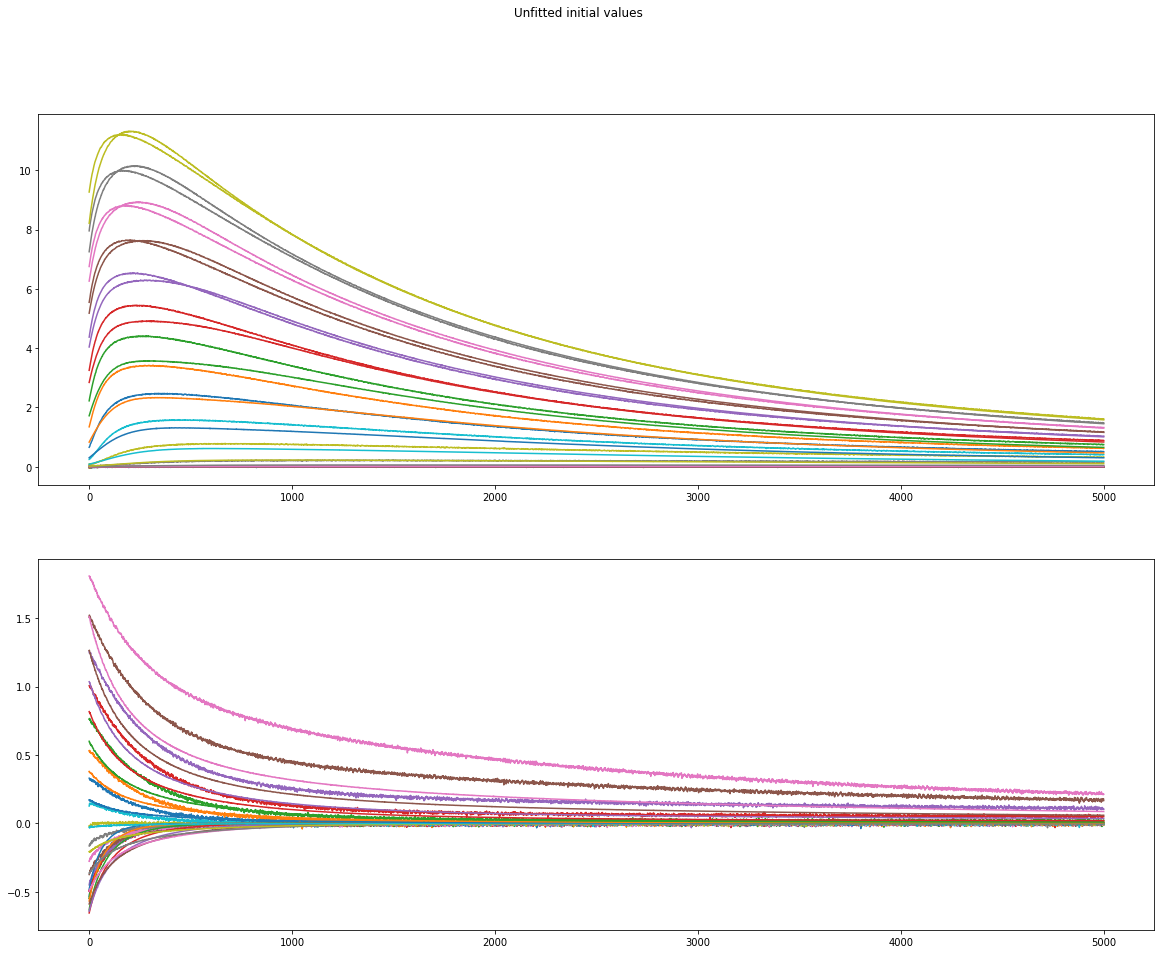

In [10]:
# Sanity check
I1, I2 = currents(ana[0], get_hold_voltages(ana[0]), pA)
I1_target, I2_target = get_targets(ana[0])

plt.figure(figsize=(20,15))
plt.subplot(2,1,1)
for I in I1_target:
    plt.plot(I)
plt.gca().set_prop_cycle(None)
for I in I1:
    plt.plot(I)

plt.subplot(2,1,2)
for I in I2_target:
    plt.plot(I)
plt.gca().set_prop_cycle(None)
for I in I2:
    plt.plot(I)
    
plt.suptitle("Unfitted initial values")

In [11]:
def residuals(p, a, hold_voltages, targets, current_fn):
    I1, I2 = current_fn(a, hold_voltages, p)
    
    # compare to target
    I1 -= targets[0]
    I2 -= targets[1]
    
    return np.concatenate((I1.ravel(), I2.ravel()))

In [12]:
fits = [0] * len(ana)
for i,a in enumerate(ana):
    hold_voltages = get_hold_voltages(a)
    targets = get_targets(a)
    
    start = time.time()
    fits[i] = scipy.optimize.least_squares(residuals, pA,
                                           args = (a, hold_voltages, targets, currents),
                                           bounds = ([-100, 0, 0,
                                                     -60, 12,               # n [-50., 15.]
                                                     -70, -10, 0,           # h [-60.,-7.,.08]
                                                     1, 40, 50, 22, -30,    # tauns [4., 62., 85., 26., -20.]
                                                     80, 1e3, 65, 5,        # tauhs [120., 5e3, 72., 8.]
                                                     .5, 5, 55, 15, -40,    # taunf [1., 22., 65., 18., -32.]
                                                     25, 500, 60, 5         # tauhf [35., 5e3, 72., 7.]
                                                     ],
                                                     [-50, 0.05, 0.15,
                                                     -40, 22,               # n
                                                     -50, -2, 0.12,         # h
                                                     10, 100, 90, 50, -5,   # tauns
                                                     160, 2e4, 100, 10,     # tauhs
                                                     2, 30, 95, 30, -5,     # taunf
                                                     50, 2e4, 80, 20        # tauhf
                                                     ]))
    print i, time.time() - start, fits[i].cost

0 3644.40567303 192.40661889598874
1 2875.45509005 93.91337527985124
2 2263.43379712 10.749567768157783
3 3255.16358995 173.48961454935434
4 2371.21175599 117.49207937259408
5 25498.1442719 783.0684375971339
6 2196.0033071 1073.0068067041407
7 3973.23028207 350.62456126822667
8 1444.32637596 46.8416044891145
9 6028.02152491 11564.790230639279
10 1634.97920012 1060.3633507568902
11 1753.72940898 222.65977306130142
12 226147.18222 989.8262260094231


In [13]:
Kv14x_26DoF_fits = fits
%store Kv14x_26DoF_fits

Stored 'Kv14x_26DoF_fits' (list)


In [12]:
%store -r
fits = Kv14x_26DoF_fits

Text(0.5,0.98,'Fitted values, 26 DoF')

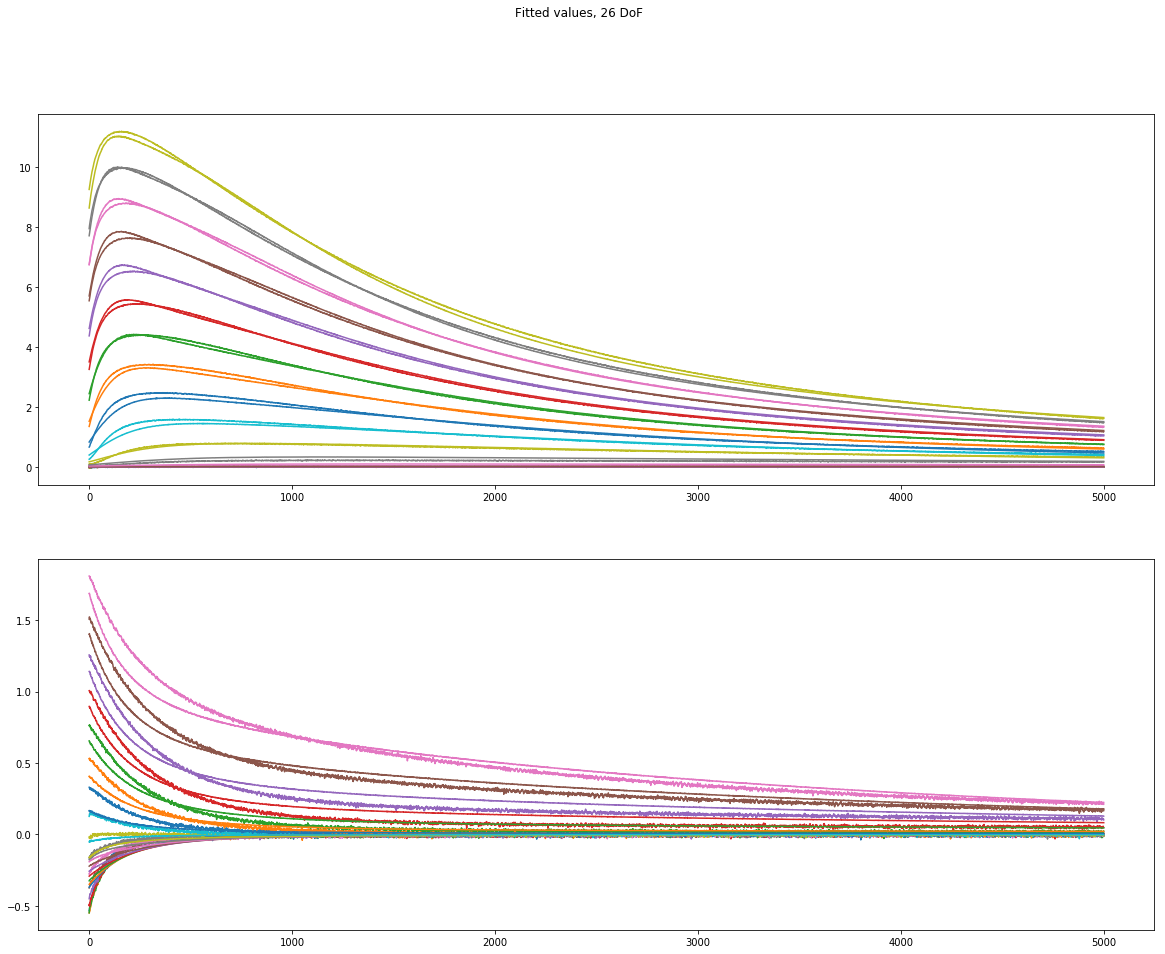

In [13]:
I1, I2 = currents(ana[0], get_hold_voltages(ana[0]), fits[0].x)
I1_target, I2_target = get_targets(ana[0])

plt.figure(figsize=(20,15))
plt.subplot(2,1,1)
for I in I1_target:
    plt.plot(I)
plt.gca().set_prop_cycle(None)
for I in I1:
    plt.plot(I)

plt.subplot(2,1,2)
for I in I2_target:
    plt.plot(I)
plt.gca().set_prop_cycle(None)
for I in I2:
    plt.plot(I)
    
plt.suptitle("Fitted values, 26 DoF")

In [14]:
def print_p26(p):
    print "E_K: %f, gslow: %f, gfast: %f" % tuple(p[0:3])
    print "n_inf off, slope:\t\t %f, %f" % tuple(p[3:5])
    print "h_inf off, slope, noninact:\t %f, %f, %f" % tuple(p[5:8])
    print "tau n slow min, max, off, slopes:\t %f, %f, %f, %f, %f" % tuple(p[8:13])
    print "tau h slow min, max, off, slope:\t %f, %f, %f, %f" % tuple(p[13:17])
    print "tau n fast min, max, off, slopes:\t %f, %f, %f, %f, %f" % tuple(p[17:22])
    print "tau h fast min, max, off, slope:\t %f, %f, %f, %f" % tuple(p[22:])

In [15]:
print_p26(fits[0].x)

E_K: -73.431449, gslow: 0.037338, gfast: 0.104281
n_inf off, slope:		 -59.741802, 21.615742
h_inf off, slope, noninact:	 -69.207501, -2.019872, 0.012704
tau n slow min, max, off, slopes:	 5.156674, 40.000000, 89.998766, 49.999968, -29.918348
tau h slow min, max, off, slope:	 99.624814, 11862.177613, 99.679114, 5.000000
tau n fast min, max, off, slopes:	 1.187887, 14.884072, 72.958772, 24.352903, -5.000037
tau h fast min, max, off, slope:	 25.001306, 1264.048176, 79.999973, 13.138915


In [16]:
def plot_p26(p):
    plt.subplot(3,2,1).set_ylabel(r'activation $n_\infty$')
    plt.subplot(3,2,2).set_ylabel(r'inactivation $h_\infty$')
    plt.subplot(3,2,3).set_ylabel(r'slow activation $\tau_n$ (ms)')
    plt.subplot(3,2,4).set_ylabel(r'slow inactivation $\tau_h$ (ms)')
    plt.subplot(3,2,5).set_ylabel(r'fast activation $\tau_n$ (ms)')
    plt.subplot(3,2,6).set_ylabel(r'fast inactivation $\tau_h$ (ms)')

    Vprobe = np.arange(-120,60)

    plt.subplot(3,2,1).plot(Vprobe, Kv14.sigmoid(p[3:5], Vprobe))
    plt.subplot(3,2,2).plot(Vprobe, Kv14.sigmoid_min(p[5:8], Vprobe))
    plt.subplot(3,2,3).plot(Vprobe, Kv14.taun(p[8:13], Vprobe))
    plt.subplot(3,2,4).semilogy(Vprobe, Kv14.tauh(p[13:17], Vprobe))
    plt.subplot(3,2,5).plot(Vprobe, Kv14.taun(p[17:22], Vprobe))
    plt.subplot(3,2,6).semilogy(Vprobe, Kv14.tauh(p[22:], Vprobe))

/usr/lib64/python2.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


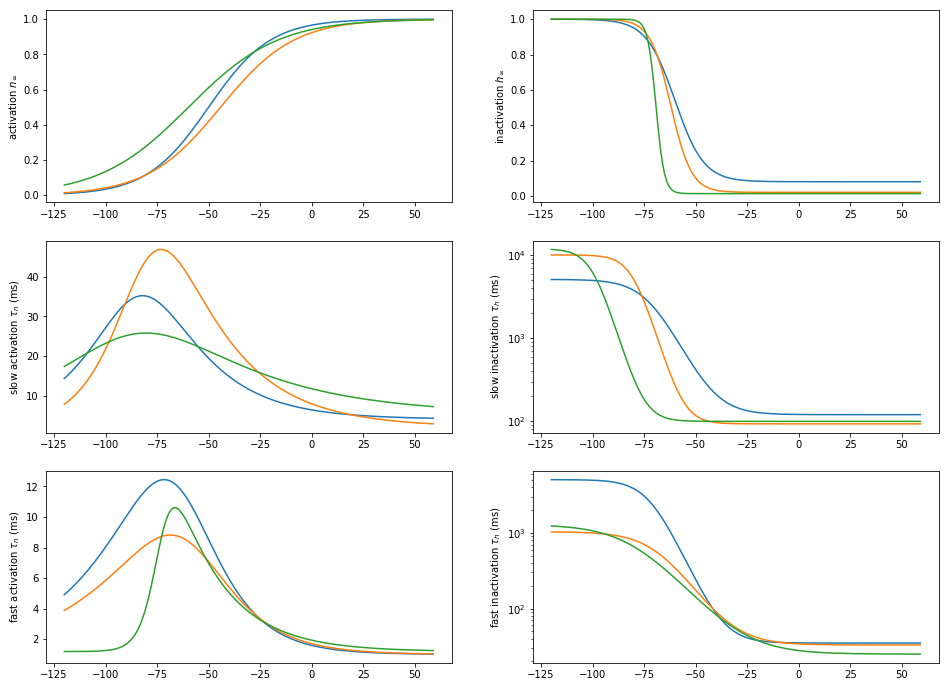

In [17]:
plt.figure(figsize=(16,12))
plot_p26(np.concatenate(((-80., 0.022, 0.092),
                     Kv14.nsA, Kv14.hsA,
                     Kv14.taunsA, Kv14.tauhsA, Kv14.taunfA, Kv14.tauhfA)))
plot_p26(pA)
plot_p26(fits[0].x)

## Observation time!
* The full fit with 31 degrees of freedom takes some 4 hours with 5000 samples per trace; Kv2.1 will take longer, because the inactivation is slower, and thus I'll need a longer trace for a sensible fit.
* Slow and fast $n_{\infty}$ are fitted to almost exactly the same values, in a nice convergence with my earlier work, and strongly suggesting that it is the time course of activation, not its voltage sensitivity, that differs between the components
* Slow and fast $h_{\infty}$ differ somewhat, the fast component being shifted towards more negative potentials, but the difference, at 5 mV, is relatively minor. Both components fit to near the minimum boundary for the slope parameter.
* I should note that the two protocols I've used aren't very good at pulling out inactivation at the lower end of the voltage scale
* The noninactivating fractions are very low; it's entirely possible that I've mistaken insufficient leak compensation for noninactivation in my previous work, although others, too, have noted some resistance to inactivation
* To conclude my observations of the activation and inactivation fits, I think that from a modelling and fitting perspective it's reasonable to collapse these parameters into one, leaving only the time scales to differ between the two components.
* The time scales for the slow and fast components separate much more clearly than I would have expected, with the slow trending slower, and the fast trending faster, than my previous fit. Quite a few values are hugging the boundaries, however, so I'll try loosening them up some.

In [ ]:
def current_components(a, hold_voltages, p):
    tmax, tblank, t2max, t2blank = get_limits(a)
    
    # Find hold states
    rec_hold_state = zip(*Kv14.state_at_common(10000, hold_voltages[0], (.5,.5,.5,.5), p[3:]))
    rec2_hold_state = zip(*Kv14.state_at_common(10000, hold_voltages[1], (.5,.5,.5,.5), p[3:]))
    
    # Populate the two-component HH states over the fitting period
    rec_states = np.zeros((len(a.rec.voltage), tmax, 4))
    for i, voltage, state in zip(range(len(a.rec.voltage)), a.rec.voltage, rec_hold_state):
        for t in range(tblank):
            V = voltage[Kv14.rec_step_t0 + t]
            state = Kv14.state_at_common(Kv14.tres, V, state, p[3:])

        for t in range(tmax):
            V = voltage[Kv14.rec_limits[0] + t]
            state = Kv14.state_at_common(Kv14.tres, V, state, p[3:])
            rec_states[i][t] = state
    
    rec2_states = np.zeros((len(a.rec2.voltage), t2max, 4))
    for i, voltage, state in zip(range(len(a.rec2.voltage)), a.rec2.voltage, rec2_hold_state):
        for t in range(Kv14.rec2_prepulse, Kv14.rec2_limits[0]):
            state = Kv14.state_at_common(Kv14.tres, voltage[t], state, p[3:])

        for t in range(t2blank):
            V = voltage[Kv14.rec2_limits[0] + t]
            state = Kv14.state_at_common(Kv14.tres, V, state, p[3:])

        for t in range(t2max):
            V = voltage[a.rec2.tail_cut + t]
            state = Kv14.state_at_common(Kv14.tres, V, state, p[3:])
            rec2_states[i][t] = state
    
    # Apply conductance to the states to compute the current components
    Irec_slow = np.reshape([(voltage[Kv14.rec_limits[0] + t] - p[0]) * p[1] * state[0]**4 * state[1]
                      for voltage, states in zip(a.rec.voltage, rec_states)
                      for t, state in enumerate(states)],
                     (len(a.rec.voltage), tmax))
    Irec_fast = np.reshape([(voltage[Kv14.rec_limits[0] + t] - p[0]) * p[2] * state[2]**4 * state[3]
                      for voltage, states in zip(a.rec.voltage, rec_states)
                      for t, state in enumerate(states)],
                     (len(a.rec.voltage), tmax))

    Irec2_slow = np.reshape([(voltage[a.rec2.tail_cut + t] - p[0]) * p[1] * state[0]**4 * state[1]
                       for voltage, states in zip(a.rec2.voltage, rec2_states)
                       for t, state in enumerate(states)],
                      (len(a.rec2.voltage), t2max))
    Irec2_fast = np.reshape([(voltage[a.rec2.tail_cut + t] - p[0]) * p[2] * state[2]**4 * state[3]
                       for voltage, states in zip(a.rec2.voltage, rec2_states)
                       for t, state in enumerate(states)],
                      (len(a.rec2.voltage), t2max))
    
    return Irec_slow, Irec_fast, Irec2_slow, Irec2_fast

In [ ]:
I1s, I1f, I2s, I2f = current_components(ana[0], get_hold_voltages(ana[0]), fits[0].x)

plt.figure(figsize=(20,30))
plt.subplot(4,1,1)
for I in I1s:
    plt.plot(I)

plt.subplot(4,1,2)
for I in I1f:
    plt.plot(I)
    
plt.subplot(4,1,3)
for I in I2s:
    plt.plot(I)

plt.subplot(4,1,4)
for I in I2f:
    plt.plot(I)
    
plt.suptitle("Fitted values, 31 DoF, separated components")